# Import necessary libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
numpy.random.seed(7)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be underst

# Load and explore the data

In [2]:
dataset=pd.read_csv("data/hourly_wages.csv")

In [3]:
dataset.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [4]:
dataset.describe(include='all')

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Prepare training and testing data

In [5]:
#create a dataframe with all training data except the target column
X = dataset.drop(columns=['wage_per_hour'])

#check that the target variable has been removed
X.head()

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,0,8,21,35,1,1,0,1,0
1,0,9,42,57,1,1,0,1,0
2,0,12,1,19,0,0,0,1,0
3,0,12,4,22,0,0,0,0,0
4,0,12,17,35,0,1,0,0,0


In [6]:
#create a dataframe with only the target column
Y = dataset[['wage_per_hour']]

#view dataframe
Y.head()

,wage_per_hour
0,5.10
1,4.95
2,6.67
3,4.00
4,7.50


In [7]:
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.25, random_state=42)

In [8]:
print("Number of image in training set ",len(trainX), len(trainY))
print("Number of image in tesing set ",len(testX), len(testY))

Number of image in training set  400 400
Number of image in tesing set  134 134


# Create a model

In [9]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = X.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

W0815 21:58:42.615293 4596381120 deprecation_wrapper.py:119] From /Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 21:58:42.631545 4596381120 deprecation_wrapper.py:119] From /Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 21:58:42.634239 4596381120 deprecation_wrapper.py:119] From /Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



# Compile the model

In [10]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='mean_squared_error')

W0815 21:58:45.520281 4596381120 deprecation_wrapper.py:119] From /Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



# Train the model

In [11]:
# Fit the model
H = model.fit(trainX, trainY, epochs=150, batch_size=10, validation_data=(testX, testY))

W0815 21:58:47.645428 4596381120 deprecation_wrapper.py:119] From /Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0815 21:58:47.711949 4596381120 deprecation_wrapper.py:119] From /Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 400 samples, validate on 134 samples
Epoch 1/150
400/400 [==============================] - 0s 563us/step - loss: 64.9713 - val_loss: 50.6513
Epoch 2/150
400/400 [==============================] - 0s 86us/step - loss: 37.3913 - val_loss: 39.5262
Epoch 3/150
400/400 [==============================] - 0s 97us/step - loss: 32.1637 - val_loss: 35.8989
Epoch 4/150
400/400 [==============================] - 0s 74us/step - loss: 29.7842 - val_loss: 33.0919
Epoch 5/150
400/400 [==============================] - 0s 78us/step - loss: 27.9069 - val_loss: 30.6169
Epoch 6/150
400/400 [==============================] - 0s 79us/step - loss: 26.1229 - val_loss: 28.2744
Epoch 7/150
400/400 [==============================] - 0s 77us/step - loss: 24.6939 - val_loss: 26.4486
Epoch 8/150
400/400 [==============================] - 0s 86us/step - loss: 23.5714 - val_loss: 24.9637
Epoch 9/150
400/400 [==============================] - 0s 108us/step - loss: 22.7462 - val_loss: 23.7664
Epoch 10/150
400

400/400 [==============================] - 0s 82us/step - loss: 19.1404 - val_loss: 19.1990
Epoch 79/150
400/400 [==============================] - 0s 80us/step - loss: 19.0732 - val_loss: 18.5562
Epoch 80/150
400/400 [==============================] - 0s 82us/step - loss: 18.9946 - val_loss: 19.0338
Epoch 81/150
400/400 [==============================] - 0s 81us/step - loss: 19.0804 - val_loss: 18.4970
Epoch 82/150
400/400 [==============================] - 0s 75us/step - loss: 18.9448 - val_loss: 18.4599
Epoch 83/150
400/400 [==============================] - 0s 72us/step - loss: 19.0492 - val_loss: 18.4645
Epoch 84/150
400/400 [==============================] - 0s 77us/step - loss: 19.1694 - val_loss: 18.5356
Epoch 85/150
400/400 [==============================] - 0s 79us/step - loss: 18.9455 - val_loss: 18.6936
Epoch 86/150
400/400 [==============================] - 0s 77us/step - loss: 18.9374 - val_loss: 18.4530
Epoch 87/150
400/400 [==============================] - 0s 76us/step

# Evaluate the results

In [12]:
# evaluate the model : train
scores = model.evaluate(trainX, trainY)
print(scores)

# # evaluate the model : test
scores = model.evaluate(testX, testY)
print(scores)

400/400 [==============================] - 0s 16us/step
18.678293991088868
134/134 [==============================] - 0s 27us/step
18.444154127320246


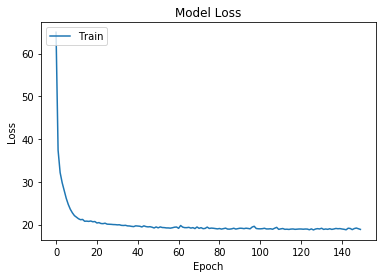

In [13]:
# Plot training & validation accuracy values
plt.plot(H.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Prediction

In [14]:
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded[1])

7.0
